In [1]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import seaborn as sns
from glob import glob


In [ ]:
# Set plot style
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-paper')

# set font scale
sns.set(font_scale=1.5)

In [113]:
def load_data(summary_json_path):
    """Load data directly from the combined summary JSON file"""
    with open(summary_json_path, 'r') as f:
        summary = json.load(f)
    
    data = []
    
    # Extract approach from directory path
    approach = os.path.basename(os.path.dirname(os.path.dirname(summary_json_path)))
    
    # Process each directory in the summary
    dir_path = list(summary.keys())[0]
    for dir_path_2 in summary[dir_path].keys():
        metname = list(summary[dir_path][dir_path_2].keys())[2]
        gtime = summary[dir_path][dir_path_2]['gtime']
        params = summary[dir_path][dir_path_2]['parameters']
        metrics = summary[dir_path][dir_path_2][metname]
        metrics = metrics[list(metrics.keys())[0]]
        
        # Convert time to seconds
        time_seconds = float(gtime['elapsed real time (wall clock) in seconds'])
        # Convert memory to GB
        memory_gb = float(gtime['maximum resident set size in KB']) / 1024 / 1024

        summary_and_perf = {
            'Approach': approach,
            'wall_time_seconds': time_seconds,
            'memory_gb': memory_gb,
            'directory': dir_path,
        }
        
        summary_and_perf.update(params)
        summary_and_perf.update(metrics)
        summary_and_perf.update(gtime)
        summary_and_perf.pop("Parameters")
        
        data.append(summary_and_perf)
        
    
    return pd.DataFrame(data)

# Load data from your combined summary files
full_df = load_data("/Users/amulyagarimella/Documents/2241finalproject/outputs/imputed/HiCNN2/down16/full/summary/summary.json")
full_df = full_df.assign(Approach="Full HiCNN")
roi_expected_df = load_data("/Users/amulyagarimella/Documents/2241finalproject/outputs/imputed/HiCNN2/down16/roi/expected/summary/summary.json")
roi_expected_df = roi_expected_df.assign(Approach="ROI HiCNN + Expected")
roi_lowres_df = load_data("/Users/amulyagarimella/Documents/2241finalproject/outputs/imputed/HiCNN2/down16/roi/lowres/summary/summary.json")
roi_lowres_df =roi_lowres_df.assign(Approach="ROI HiCNN + Lowres")

# Combine all dataframes
df = pd.concat([full_df, roi_expected_df, roi_lowres_df], ignore_index=True)

In [114]:
df.to_csv("/Users/amulyagarimella/Documents/2241finalproject/outputs/experiment_summary.csv", index=False)

In [141]:
df.columns

Index(['Approach', 'wall_time_seconds', 'memory_gb', 'directory', 'MCCOOL',
       'CHROM', 'CHROM_LEN', 'USE_ROI', 'ROI_SPARSITY', 'ROI_METHOD',
       'INTERPOLATION', 'EXPECTED_VALUES', 'RESOLUTION', 'MODEL', 'RATIO',
       'APPLY_DOWN_RATIO', 'DATE', 'Pearson Correlation',
       'Spearman Correlation', 'PSNR', 'SSIM', 'MSE', 'MAE',
       'involuntary context switches',
       'elapsed real time (wall clock) in [hour:]min:sec',
       'elapsed real time (wall clock) in seconds', 'major page faults',
       'maximum resident set size in KB', 'percent of CPU this job got',
       'minor page faults', 'system (kernel) time in seconds',
       'user time in seconds', 'voluntary context switches',
       'exit status of command'],
      dtype='object')

In [142]:
df_without_random = df[df['ROI_METHOD'] != 'random']

## Fig 1: Overall performance comparison (without random)

In [163]:
os.makedirs('../figures/fig1', exist_ok=True)



# Define colors for different approaches
approach_colors = {
    'Full HiCNN': '#0072B2',  # Blue
    'ROI HiCNN + Expected': '#E69F00',  # Orange
    'ROI HiCNN + Lowres': '#009E73'  # Green
}

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3389635422.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random, x='Approach', y='wall_time_seconds', ax=ax1, palette=approach_colors)
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3389635422.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random, x='Approach', y='memory_gb', ax=ax2, palette=approach_colors)


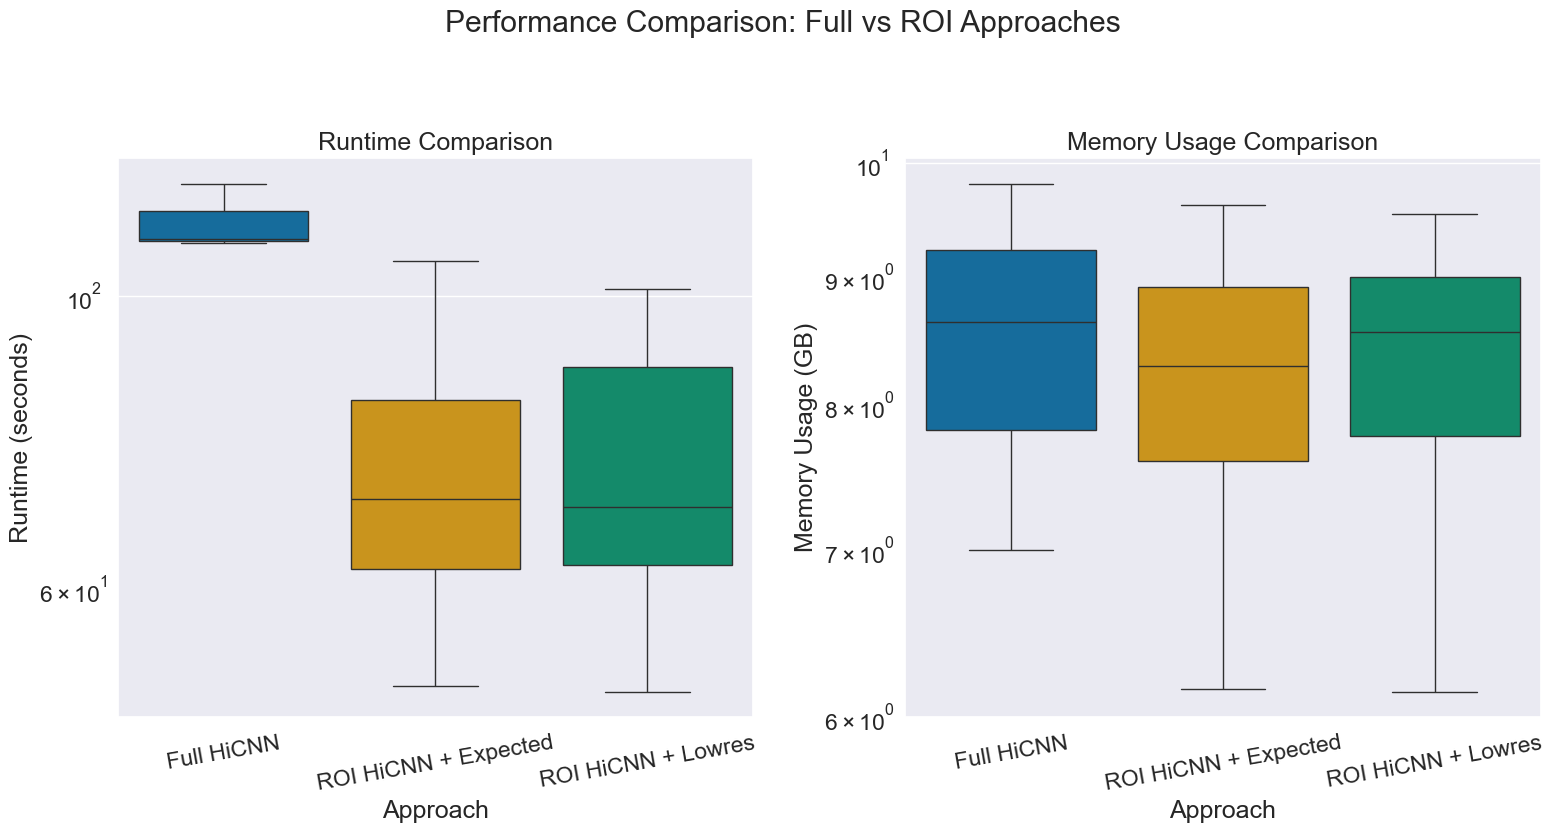

In [164]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True)
ax1.tick_params(axis='x', rotation=10)
ax2.tick_params(axis='x', rotation=10)

# Runtime plot
sns.boxplot(data=df_without_random, x='Approach', y='wall_time_seconds', ax=ax1, palette=approach_colors)
ax1.set_xlabel('Approach')
ax1.set_title('Runtime Comparison')
ax1.set_ylabel('Runtime (seconds)')
ax1.set_yscale('log')

# Memory plot
sns.boxplot(data=df_without_random, x='Approach', y='memory_gb', ax=ax2, palette=approach_colors)
ax2.set_title('Memory Usage Comparison')
ax2.set_xlabel('Approach')
ax2.set_ylabel('Memory Usage (GB)')
ax2.set_yscale('log')

plt.suptitle('Performance Comparison: Full vs ROI Approaches', y=1.05)
plt.savefig('../figures/fig1/performance_comparison.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/2801082930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random, x='Approach', y=performance_metric[0], palette=approach_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/2801082930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random, x='Approach', y=performance_metric[0], palette=approach_colors, ax=ax[i])


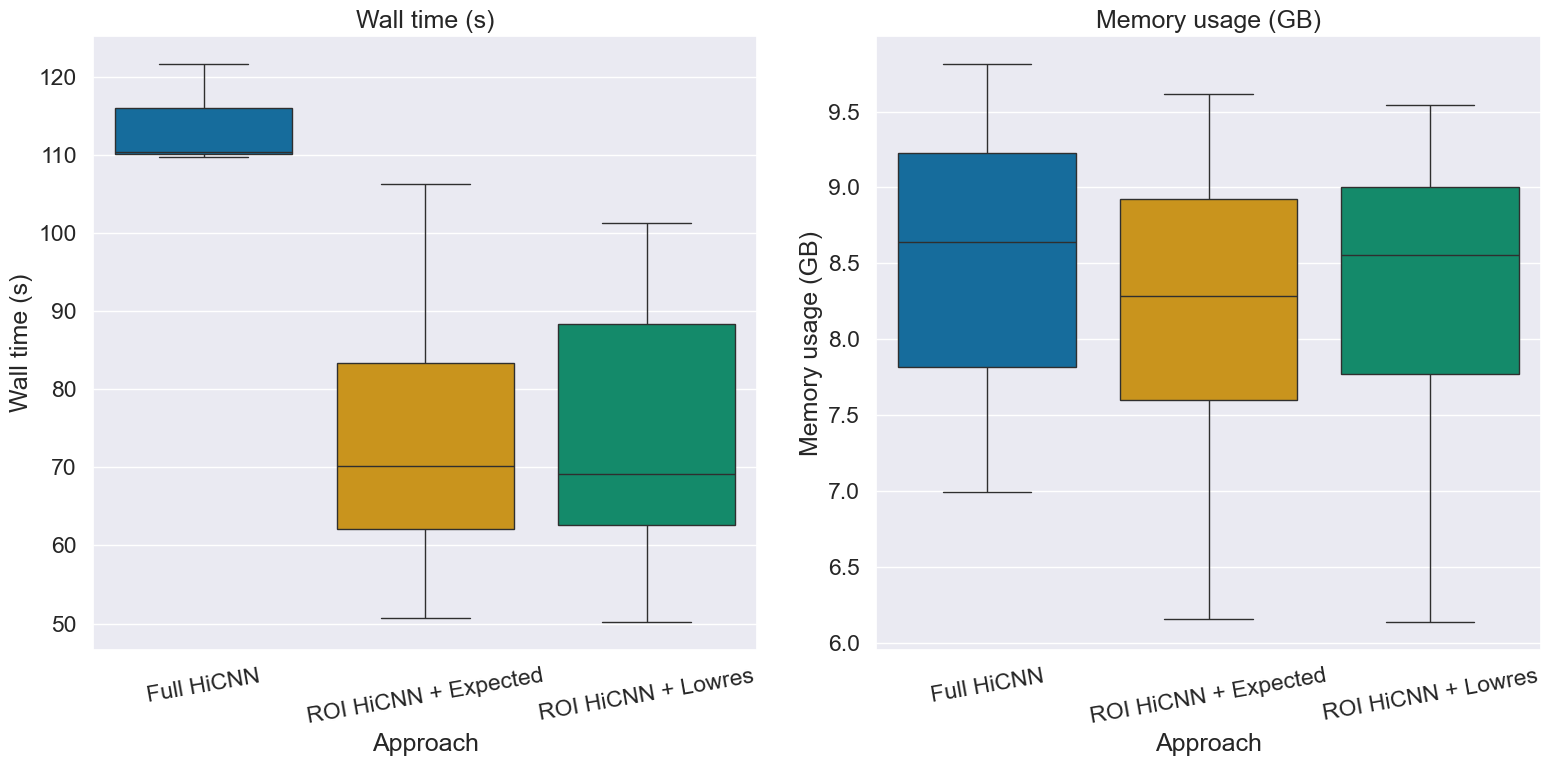

In [173]:

fig, ax = plt.subplots(1,2, figsize=(16, 8), sharex=True)
ax = ax.flatten()
for i, performance_metric in enumerate([('wall_time_seconds', 'Wall time (s)'), ('memory_gb', 'Memory usage (GB)')]):
    sns.boxplot(data=df_without_random, x='Approach', y=performance_metric[0], palette=approach_colors, ax=ax[i])
    ax[i].set_title(f'{performance_metric[1]}')
    ax[i].set_ylabel(f'{performance_metric[1]}')
    ax[i].set_xlabel('Approach')
    ax[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('../figures/fig1/performance.png', bbox_inches='tight')
plt.show()

## Fig 2: Overall quality comparison (without random)

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3686161115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random, x='Approach', y=quality_measure[0], palette=colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3686161115.py:6: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.boxplot(data=df_without_random, x='Approach', y=quality_measure[0], palette=colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3686161115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random, x='Approach', y=quality_measure[0], palette=colors, ax=a

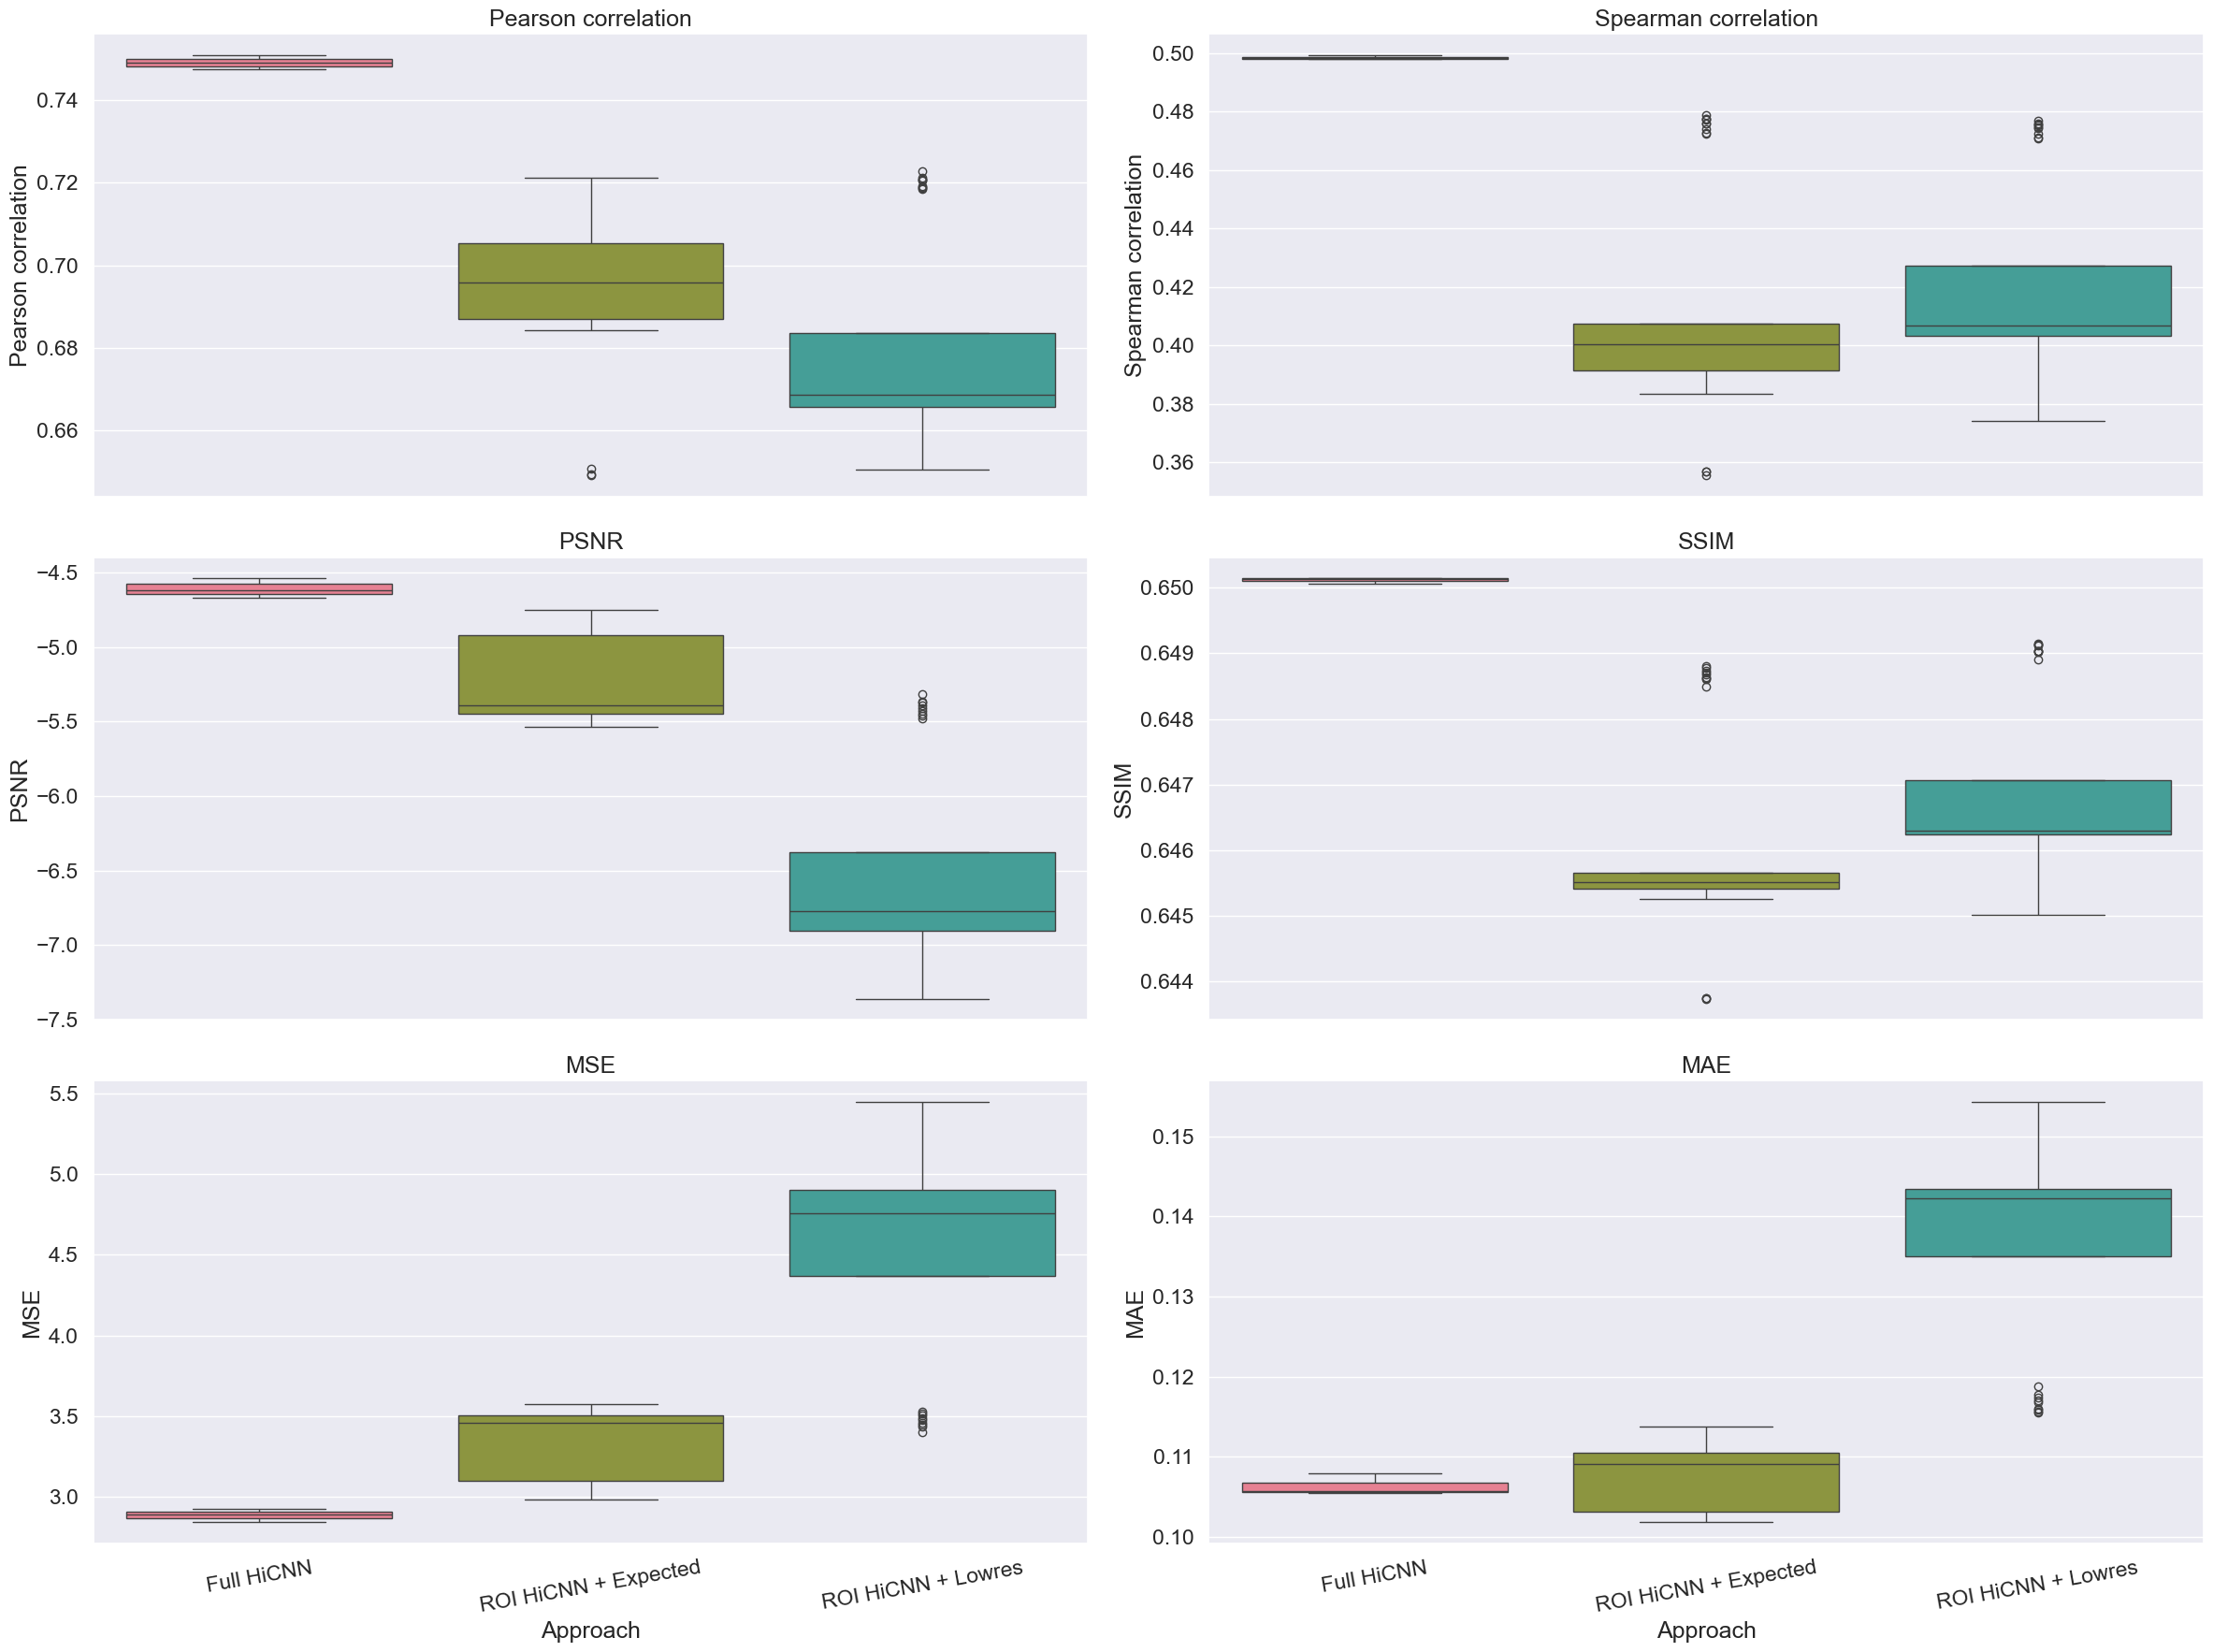

In [182]:
os.makedirs('../figures/fig2', exist_ok=True)

fig, ax = plt.subplots(3,2, figsize=(24, 18), sharex=True)
ax = ax.flatten()
for i, quality_measure in enumerate([('Pearson Correlation', 'Pearson correlation'), ('Spearman Correlation', 'Spearman correlation'), ('PSNR', 'PSNR'), ('SSIM', 'SSIM'), ('MSE', 'MSE'), ('MAE', 'MAE')]):
    sns.boxplot(data=df_without_random, x='Approach', y=quality_measure[0], palette=colors, ax=ax[i])
    ax[i].set_title(f'{quality_measure[1]}')
    ax[i].set_ylabel(f'{quality_measure[1]}')
    ax[i].set_xlabel('Approach')
    ax[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('../figures/fig2/quality_comparison.png', bbox_inches='tight')
plt.show()

## Fig 3: Impact of ROI model choice on performance metrics

In [196]:
os.makedirs('../figures/fig3', exist_ok=True)

In [197]:
methods = df['ROI_METHOD'].unique()
methods_list = list(methods)
methods_list.remove('random')
methods_list.append('random')

methods_colors = sns.color_palette("husl", len(methods)-1)
methods_colors.append('red')

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3924779417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=performance_metric[0], order=methods_list, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3924779417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=performance_metric[0], order=methods_list, palette=methods_colors, ax=ax[i])


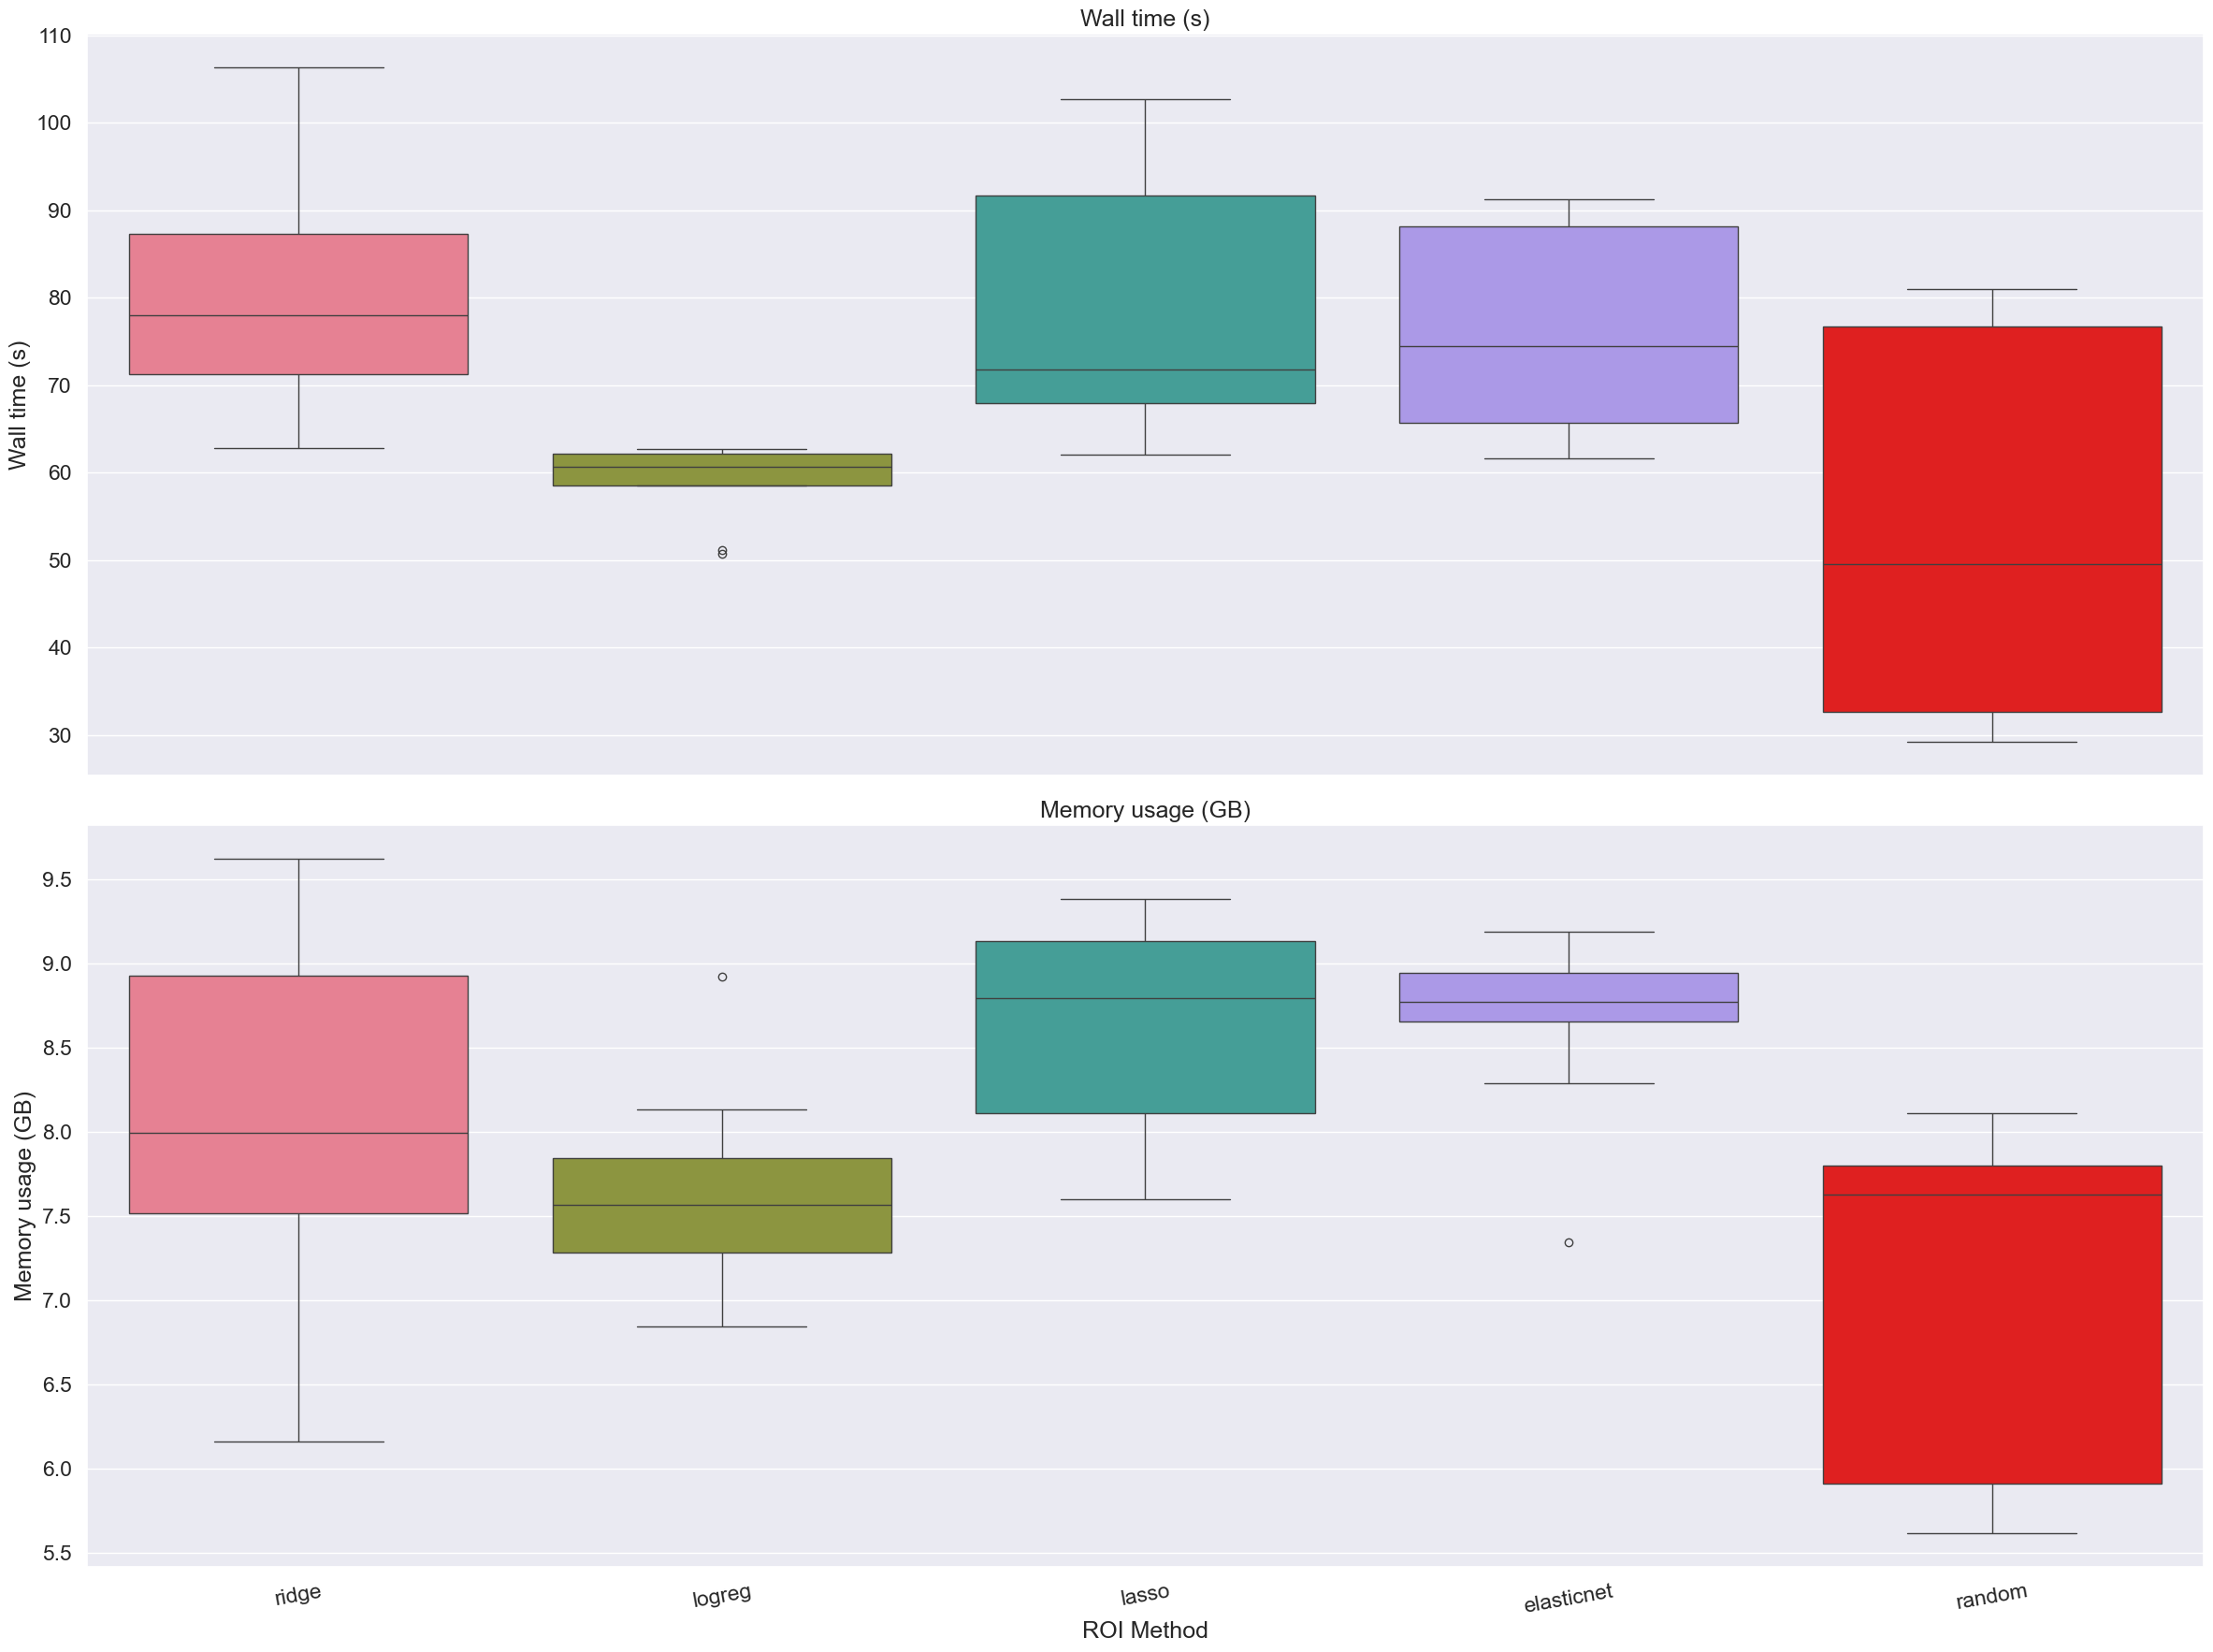

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3924779417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=performance_metric[0], order=methods_list, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3924779417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=performance_metric[0], order=methods_list, palette=methods_colors, ax=ax[i])


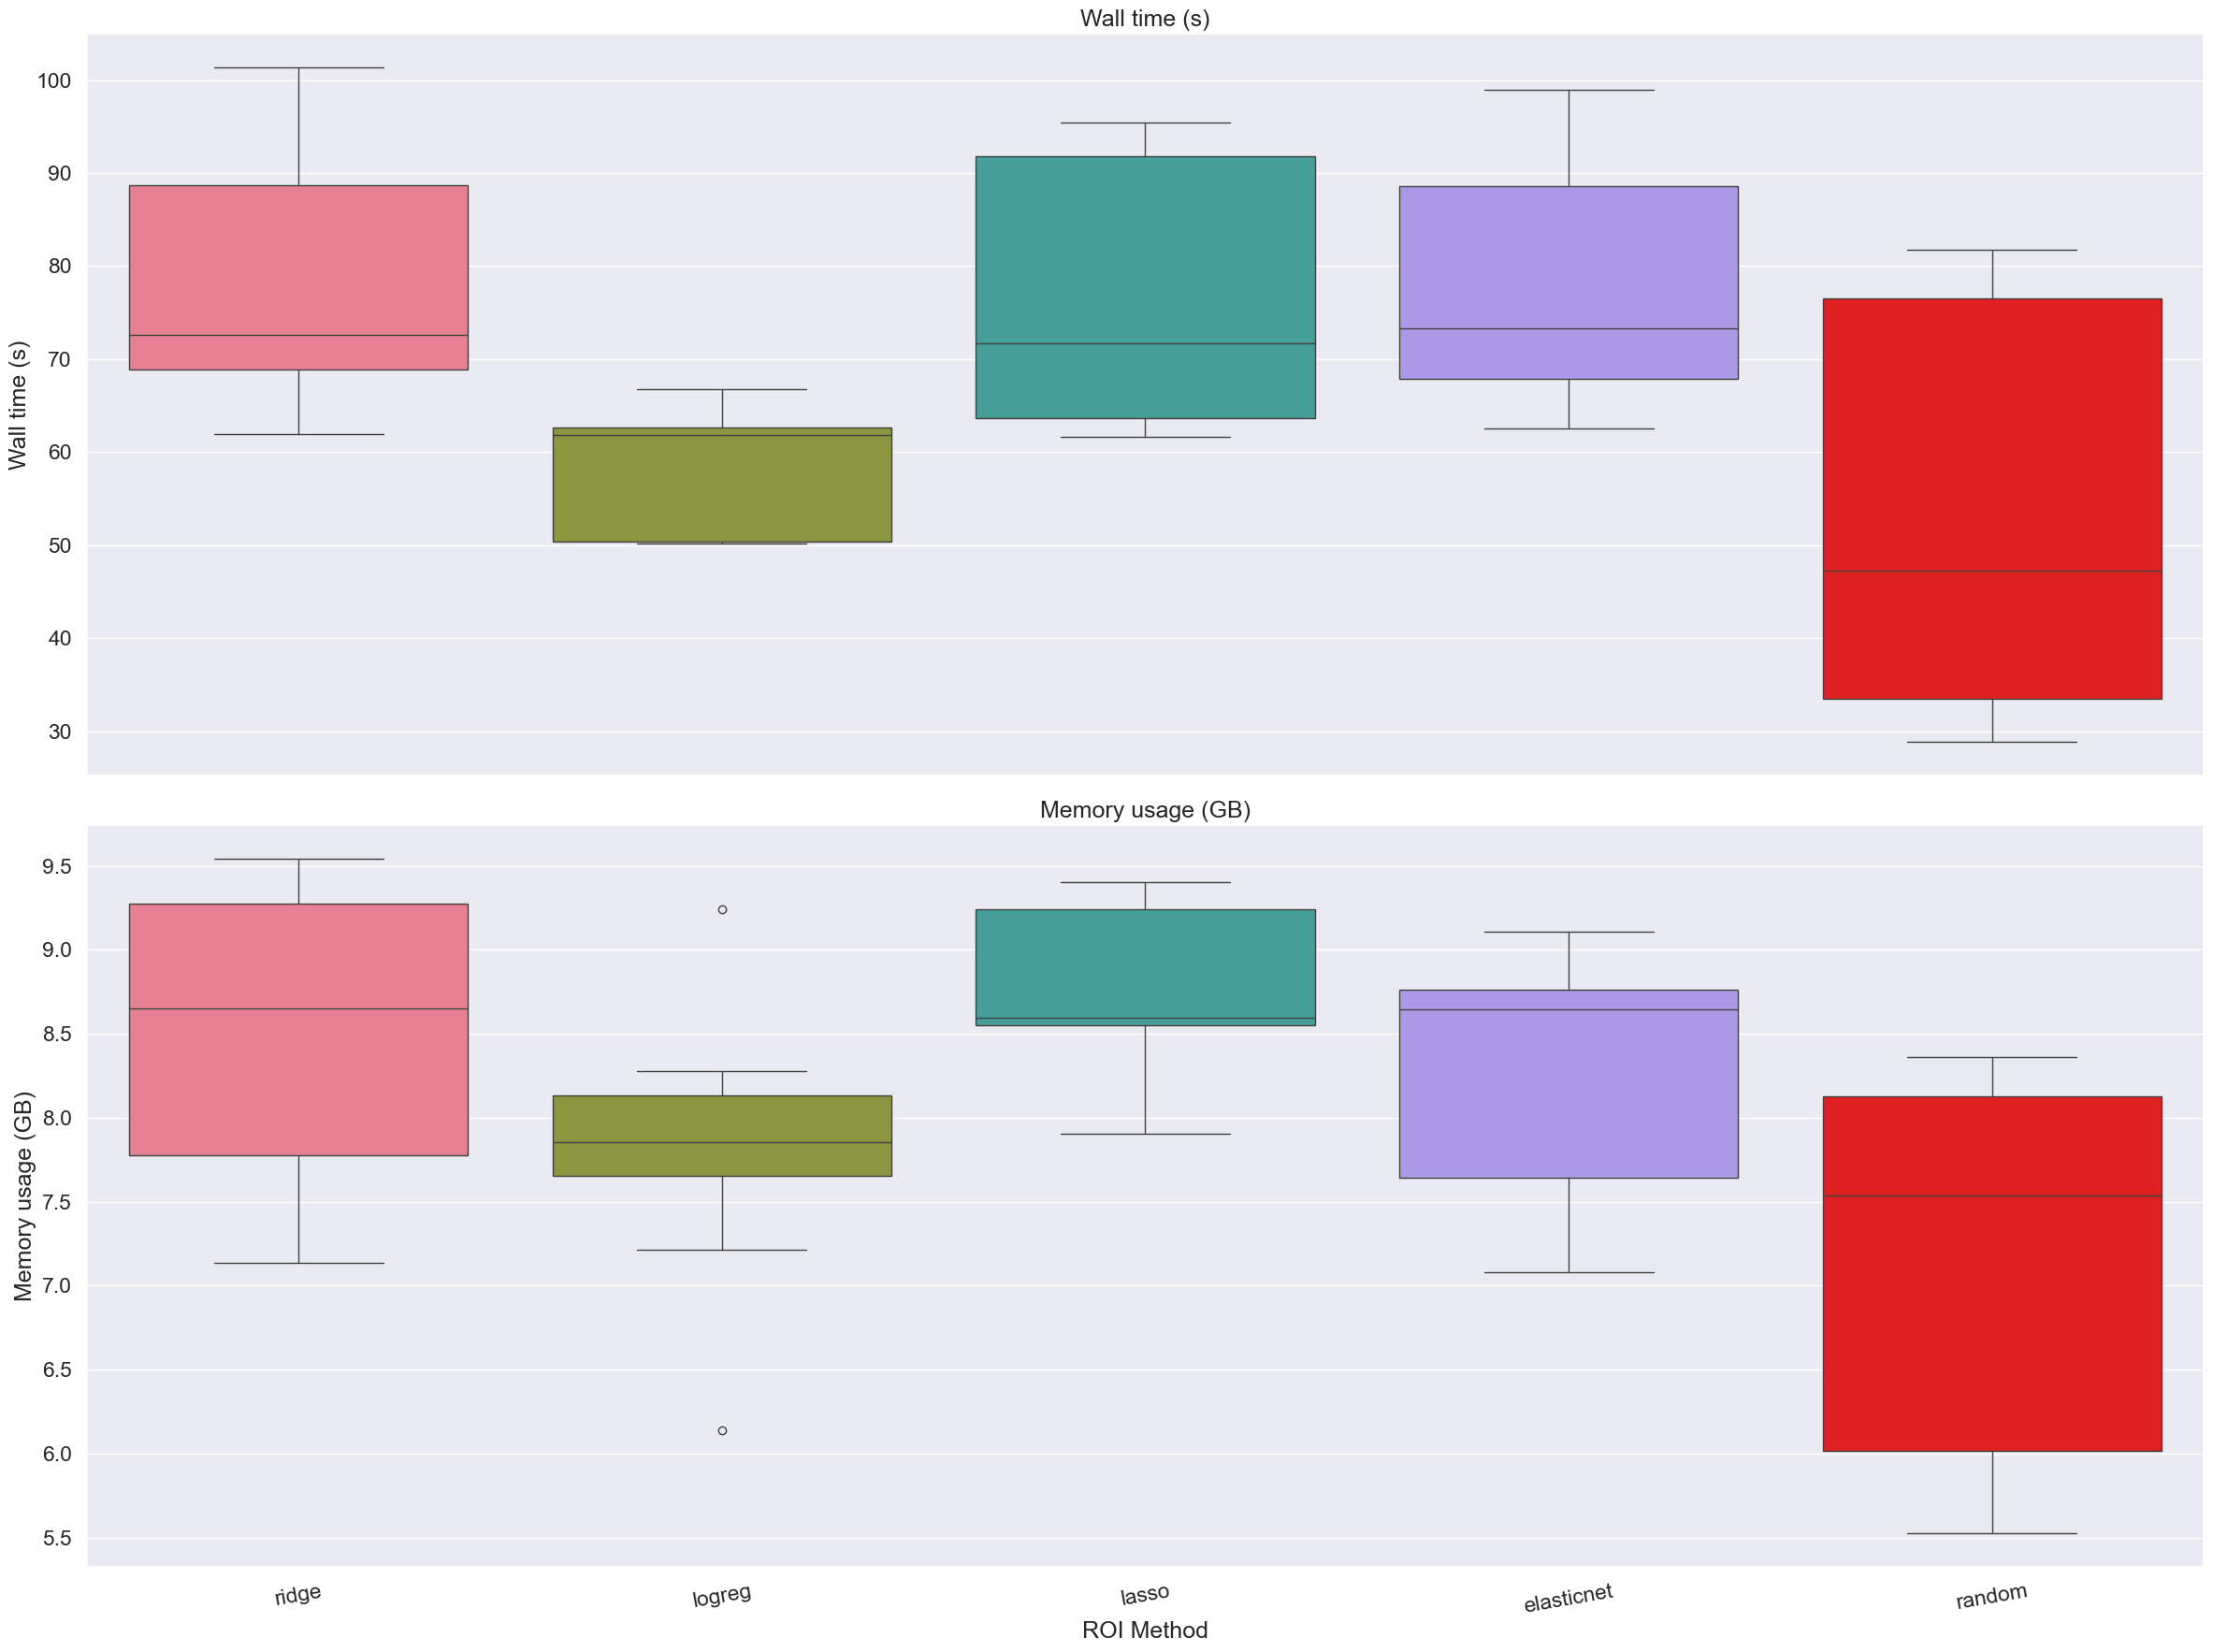

In [198]:
for approach in ['ROI HiCNN + Expected', 'ROI HiCNN + Lowres']:
    fig, ax = plt.subplots(2,1, figsize=(24, 18), sharex=True)
    ax = ax.flatten()
    for i, performance_metric in enumerate([('wall_time_seconds', 'Wall time (s)'), ('memory_gb', 'Memory usage (GB)')]):
        sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=performance_metric[0], order=methods_list, palette=methods_colors, ax=ax[i])
        ax[i].set_title(f'{performance_metric[1]}')
        ax[i].set_ylabel(f'{performance_metric[1]}')
        ax[i].set_xlabel('ROI Method')
        ax[i].tick_params(axis='x', rotation=10)

    plt.tight_layout()
    plt.savefig(f'../figures/fig3/roi_performance_{approach.replace(" + ", "_").replace(" ", "_").lower()}.png', bbox_inches='tight')
    plt.show()

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/780279125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=performance_metric[0], order=methods_list, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/780279125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=performance_metric[0], order=methods_list, palette=methods_colors, ax=ax[i])


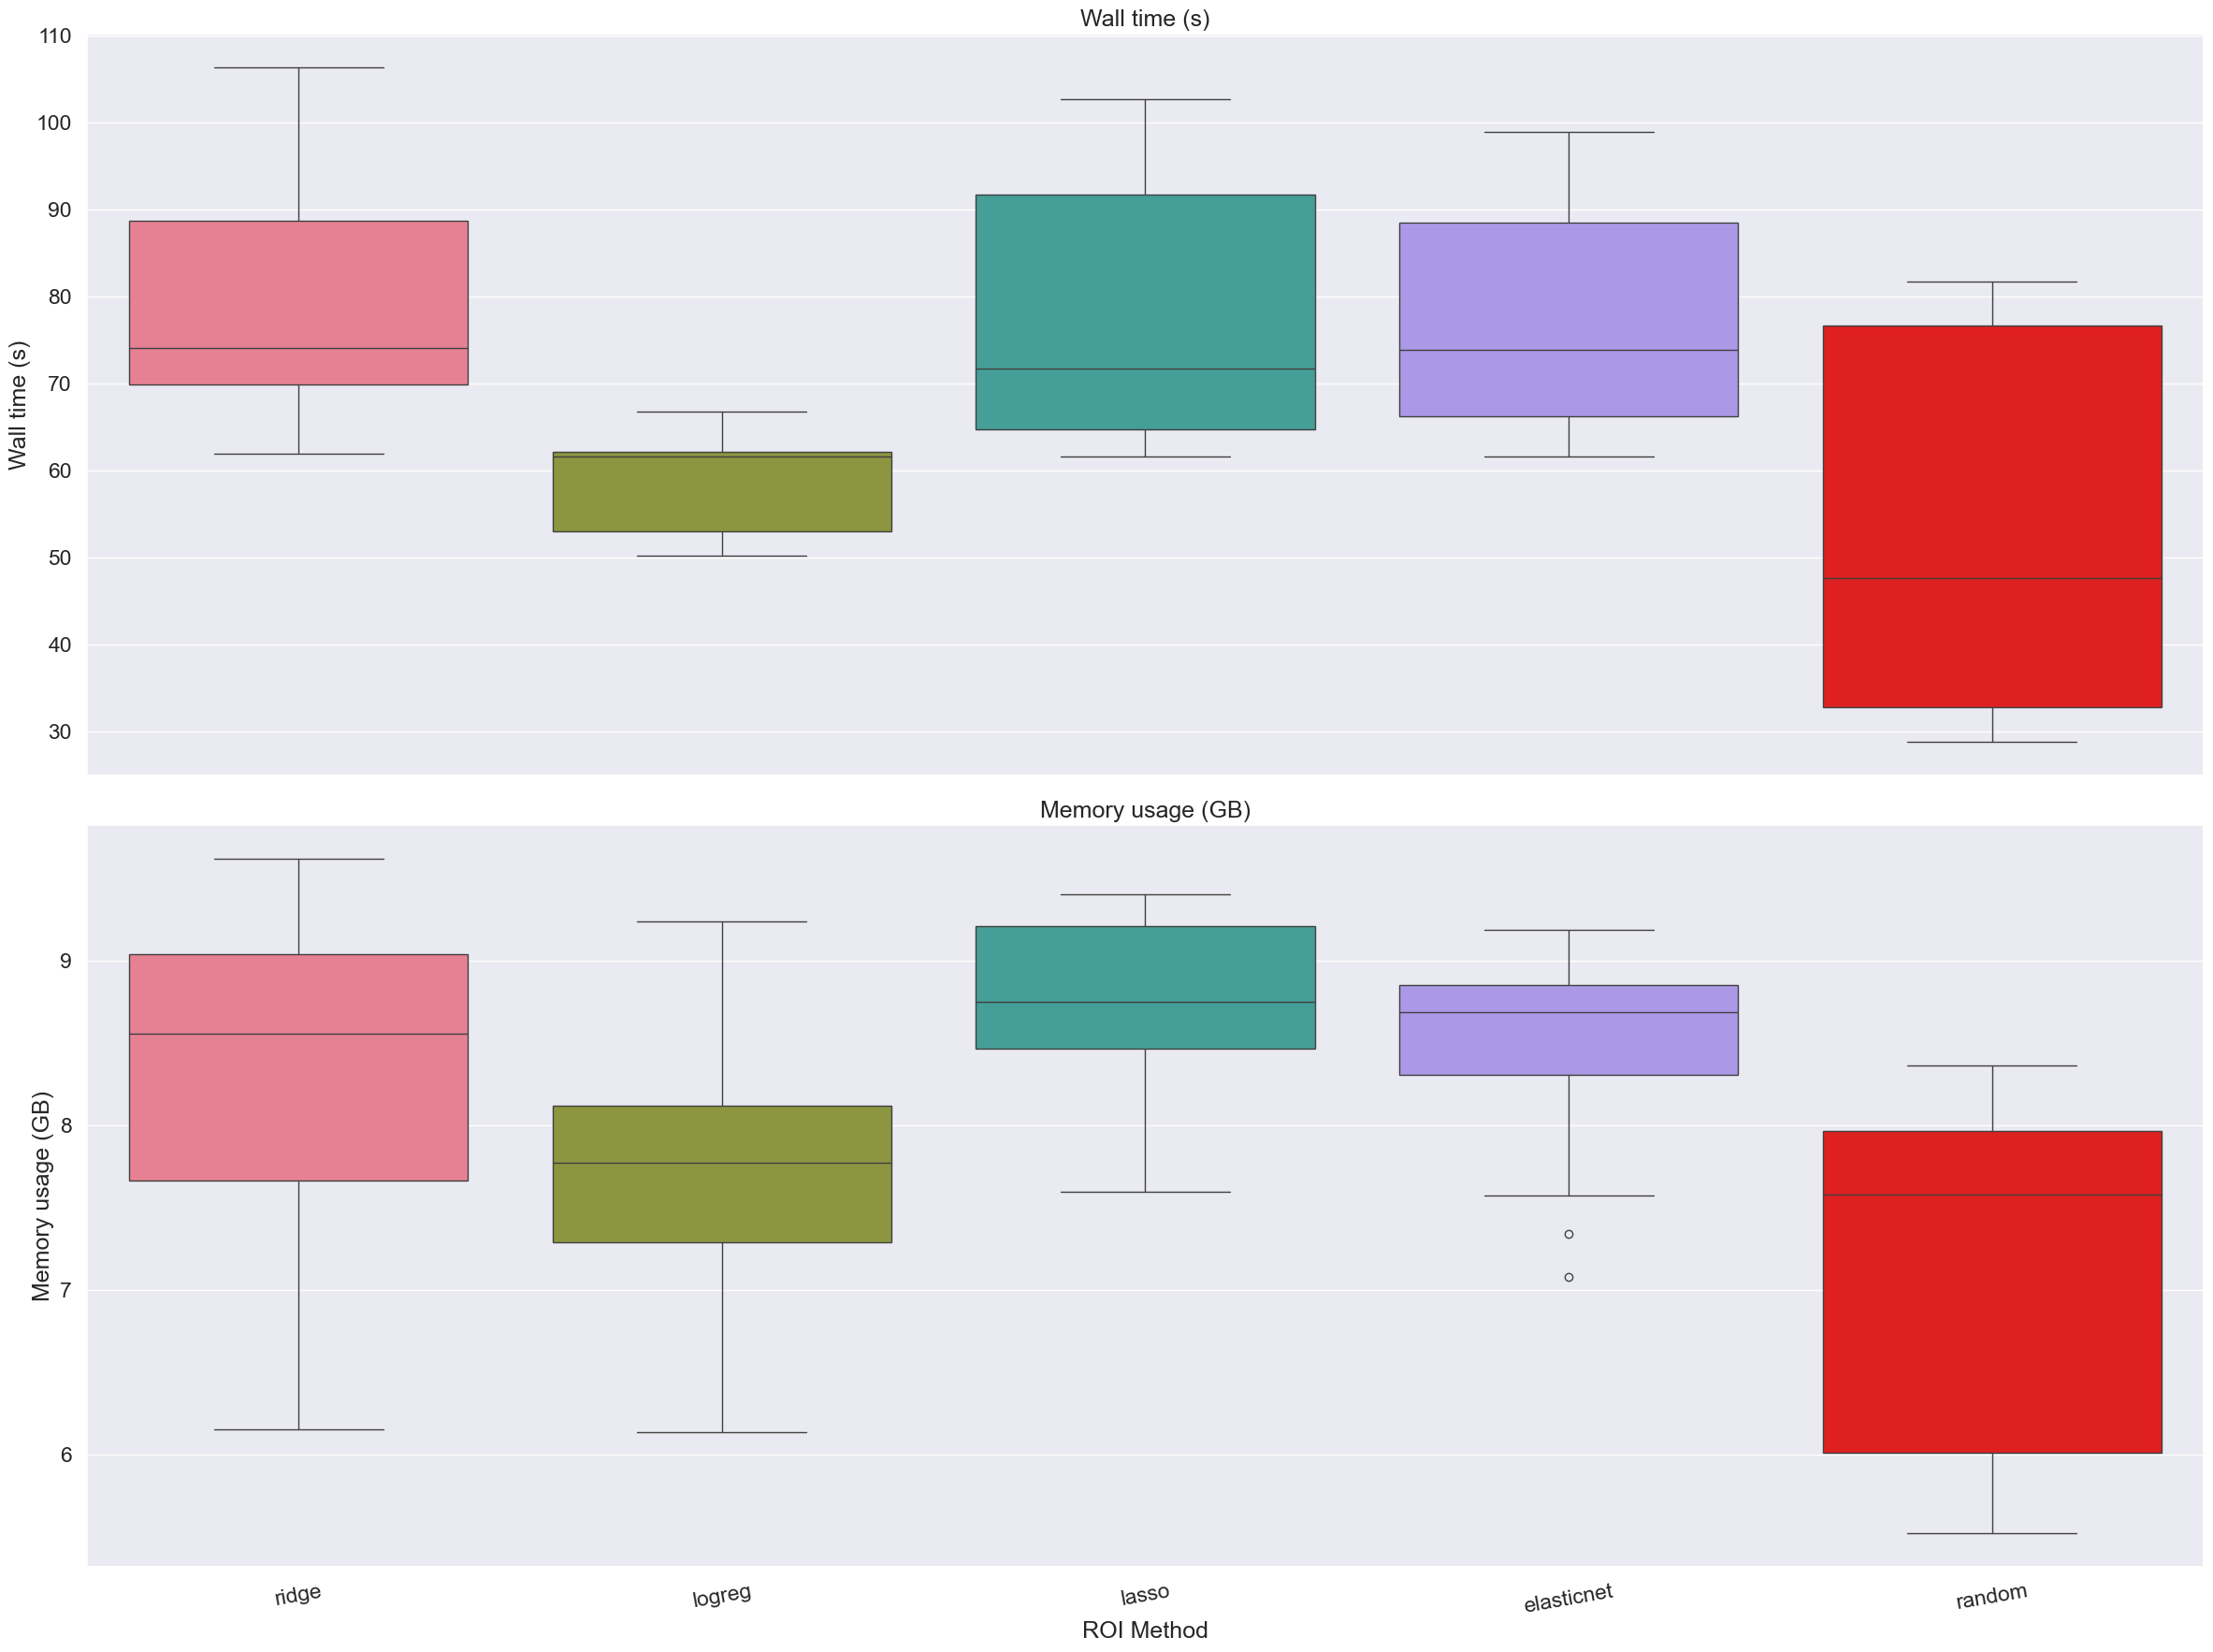

In [199]:

fig, ax = plt.subplots(2,1, figsize=(24, 18), sharex=True)
ax = ax.flatten()
for i, performance_metric in enumerate([('wall_time_seconds', 'Wall time (s)'), ('memory_gb', 'Memory usage (GB)')]):
    sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=performance_metric[0], order=methods_list, palette=methods_colors, ax=ax[i])
    ax[i].set_title(f'{performance_metric[1]}')
    ax[i].set_ylabel(f'{performance_metric[1]}')
    ax[i].set_xlabel('ROI Method')
    ax[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('../figures/fig3/roi_performance_agg.png', bbox_inches='tight')
plt.show()

## Fig 4: Impact of ROI model choice on quality metrics

In [200]:

os.makedirs('../figures/fig4', exist_ok=True)


methods = df['ROI_METHOD'].unique()
methods_list = list(methods)
methods_list.remove('random')
methods_list.append('random')

methods_colors = sns.color_palette("husl", len(methods)-1)
methods_colors.append('red')

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/1247495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=quality_measure[0], order=methods_list, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/1247495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=quality_measure[0], order=methods_list, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/1247495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

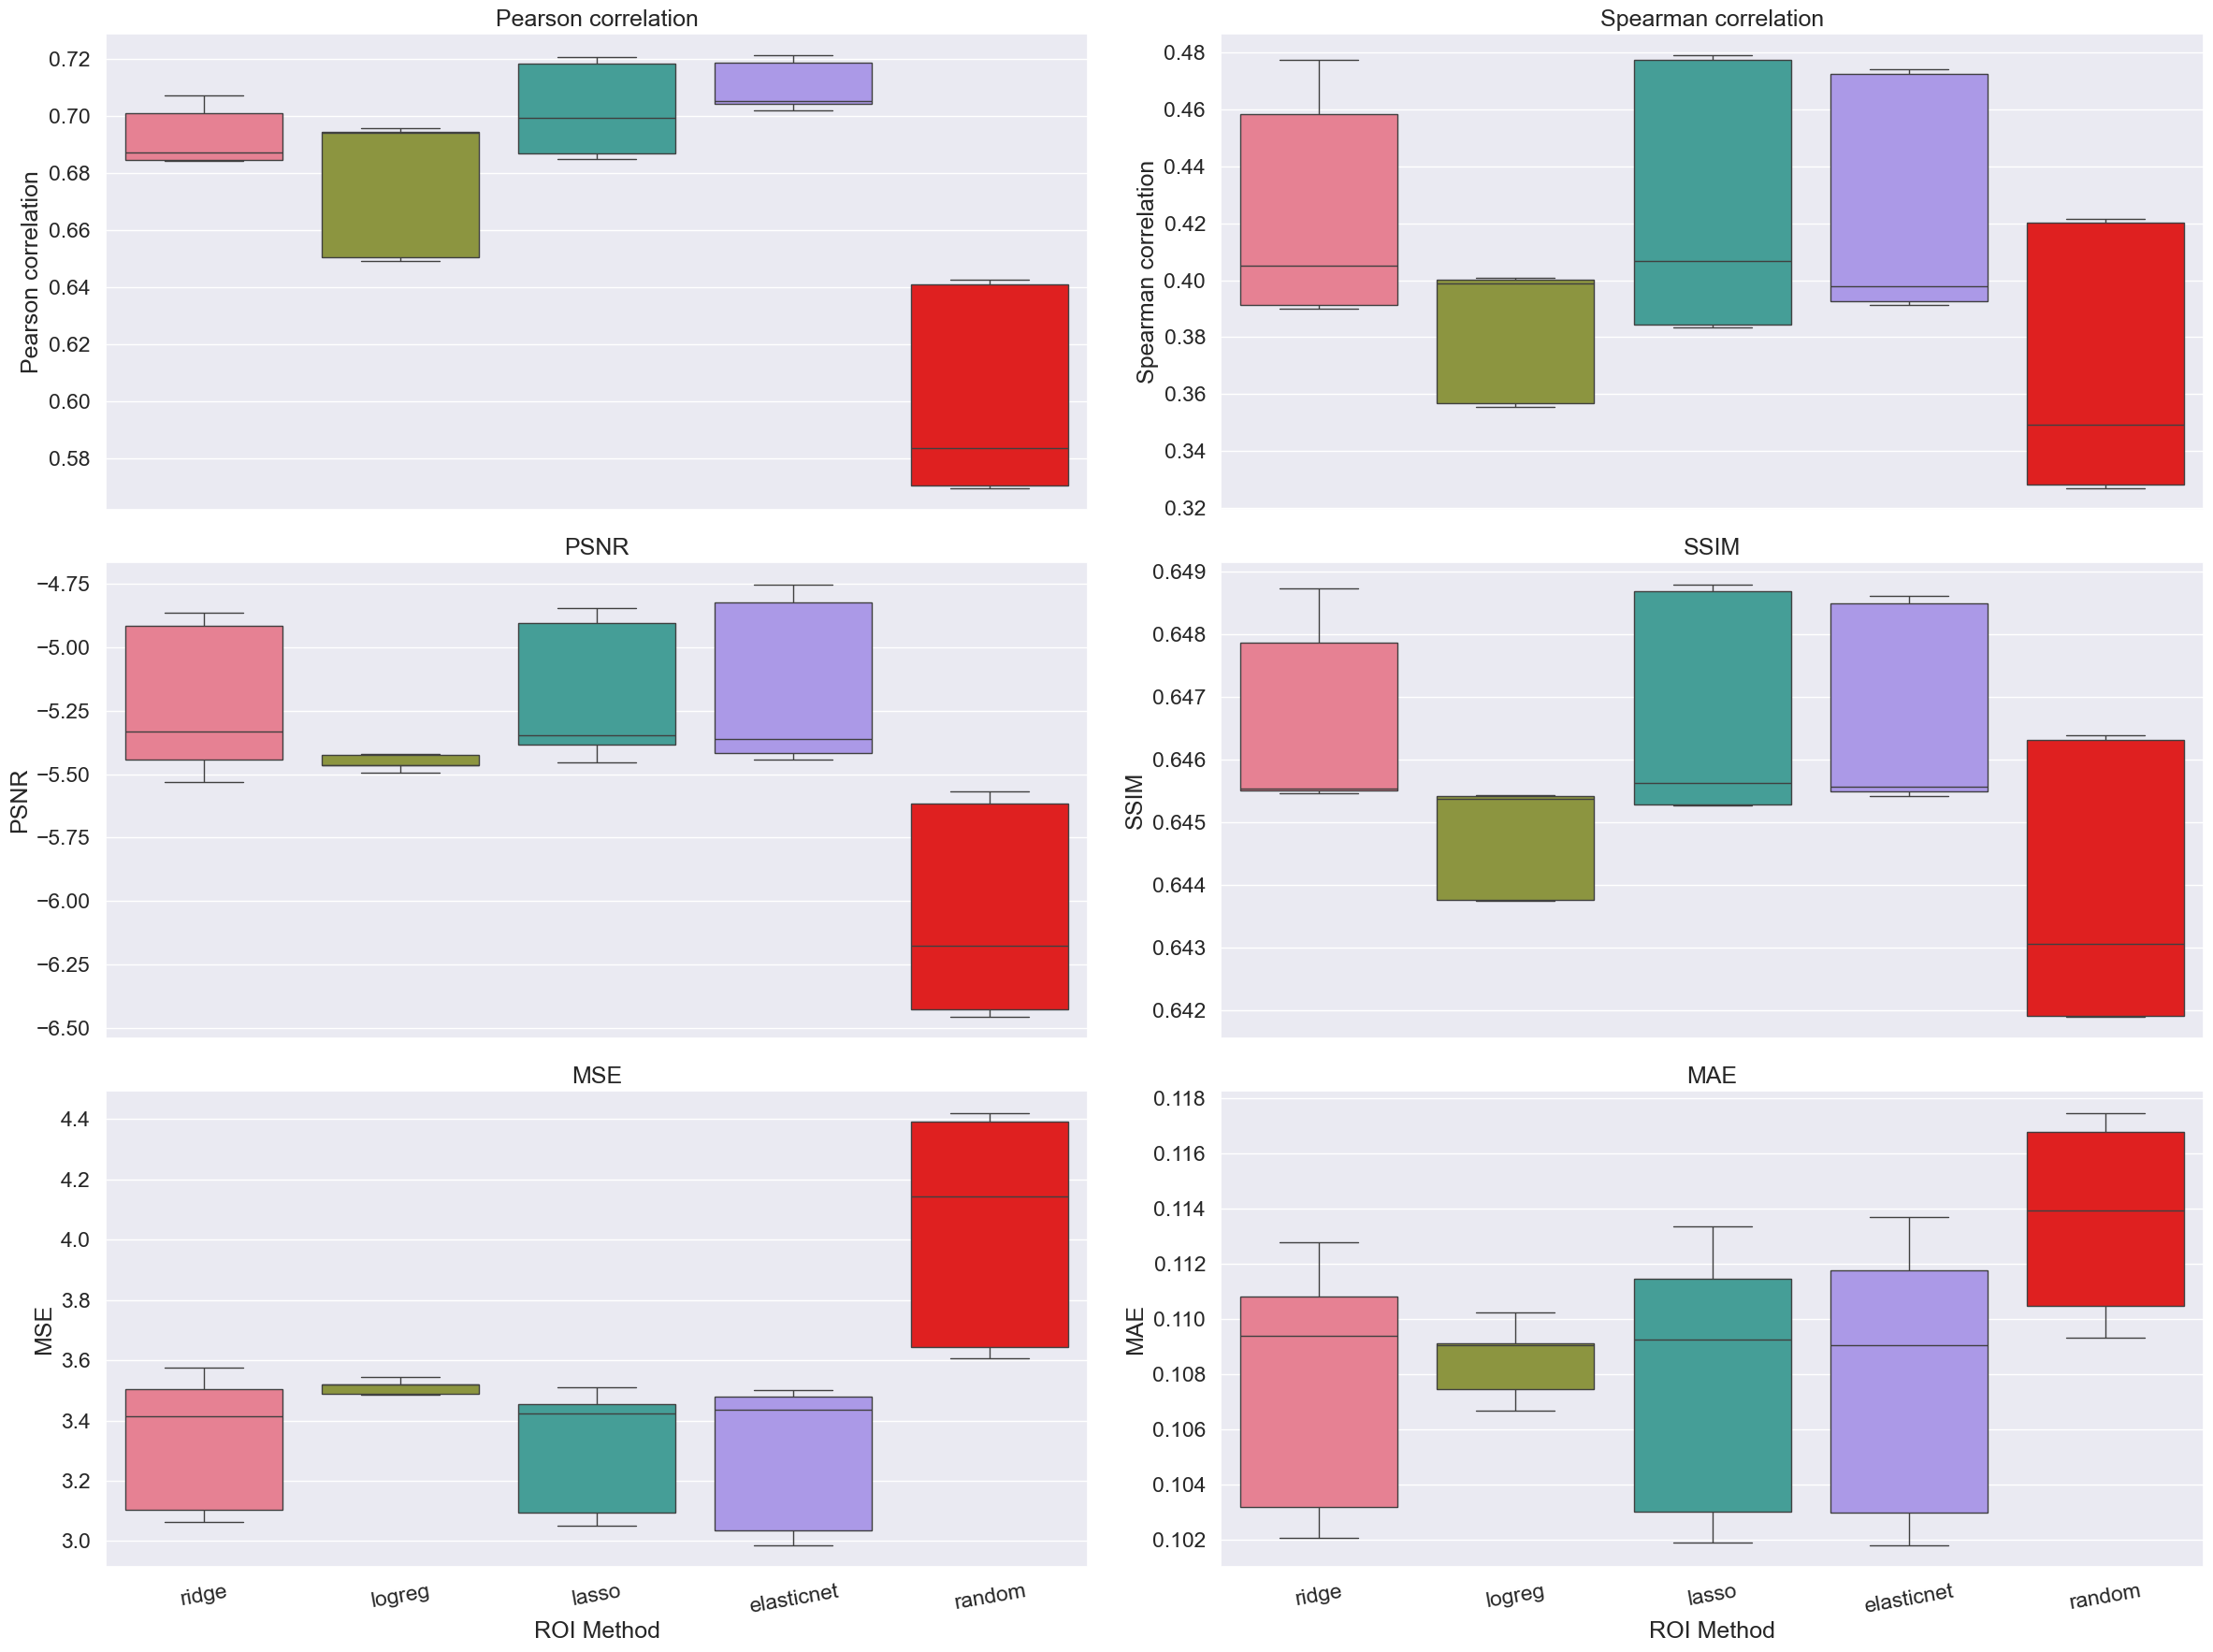

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/1247495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=quality_measure[0], order=methods_list, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/1247495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=quality_measure[0], order=methods_list, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/1247495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

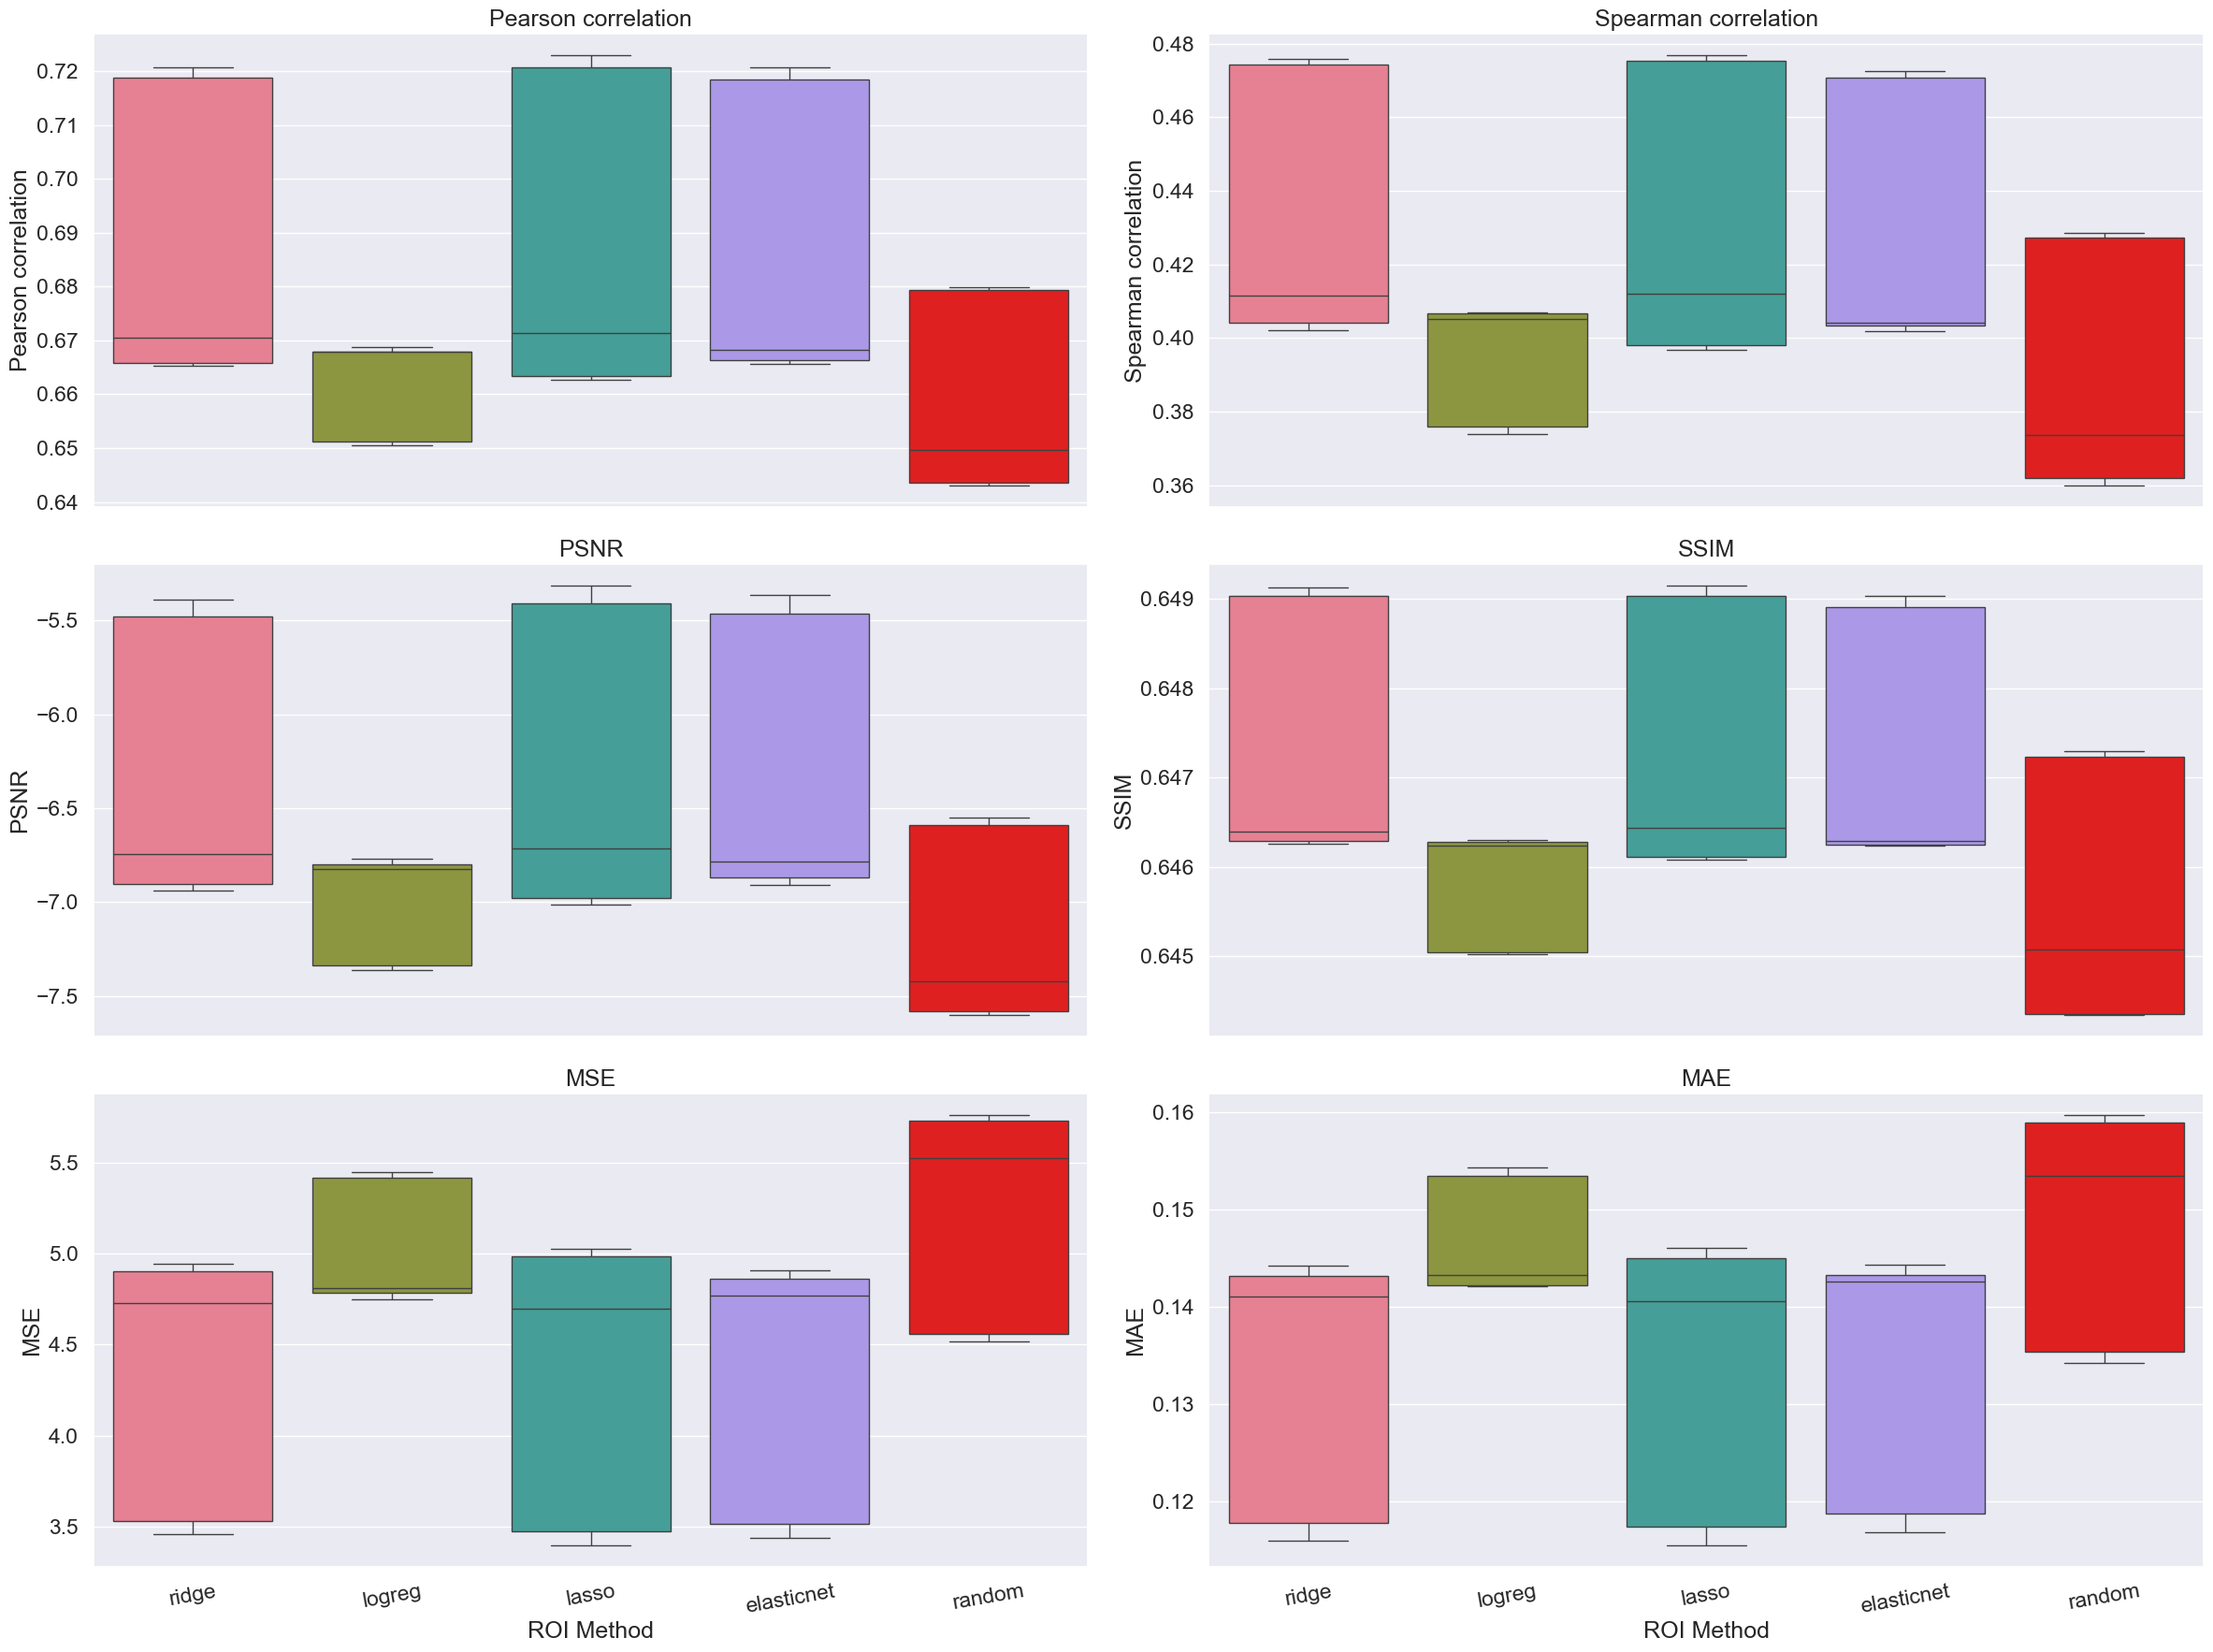

In [201]:

for approach in ['ROI HiCNN + Expected', 'ROI HiCNN + Lowres']:
    fig, ax = plt.subplots(3,2, figsize=(24, 18), sharex=True)

    ax = ax.flatten()
    for i, quality_measure in enumerate([('Pearson Correlation', 'Pearson correlation'), ('Spearman Correlation', 'Spearman correlation'), ('PSNR', 'PSNR'), ('SSIM', 'SSIM'), ('MSE', 'MSE'), ('MAE', 'MAE')]):
        sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=quality_measure[0], order=methods_list, palette=methods_colors, ax=ax[i])
        ax[i].set_title(f'{quality_measure[1]}')
        ax[i].set_ylabel(f'{quality_measure[1]}')
        ax[i].set_xlabel('ROI Method')
        ax[i].tick_params(axis='x', rotation=10)

    plt.tight_layout()
    plt.savefig(f'../figures/fig4/roi_performance_{approach.replace(" + ", "_").replace(" ", "_").lower()}.png', bbox_inches='tight')
    plt.show()

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3151982647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=quality_measure[0], order=methods_list, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3151982647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=quality_measure[0], order=methods_list, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_81033/3151982647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

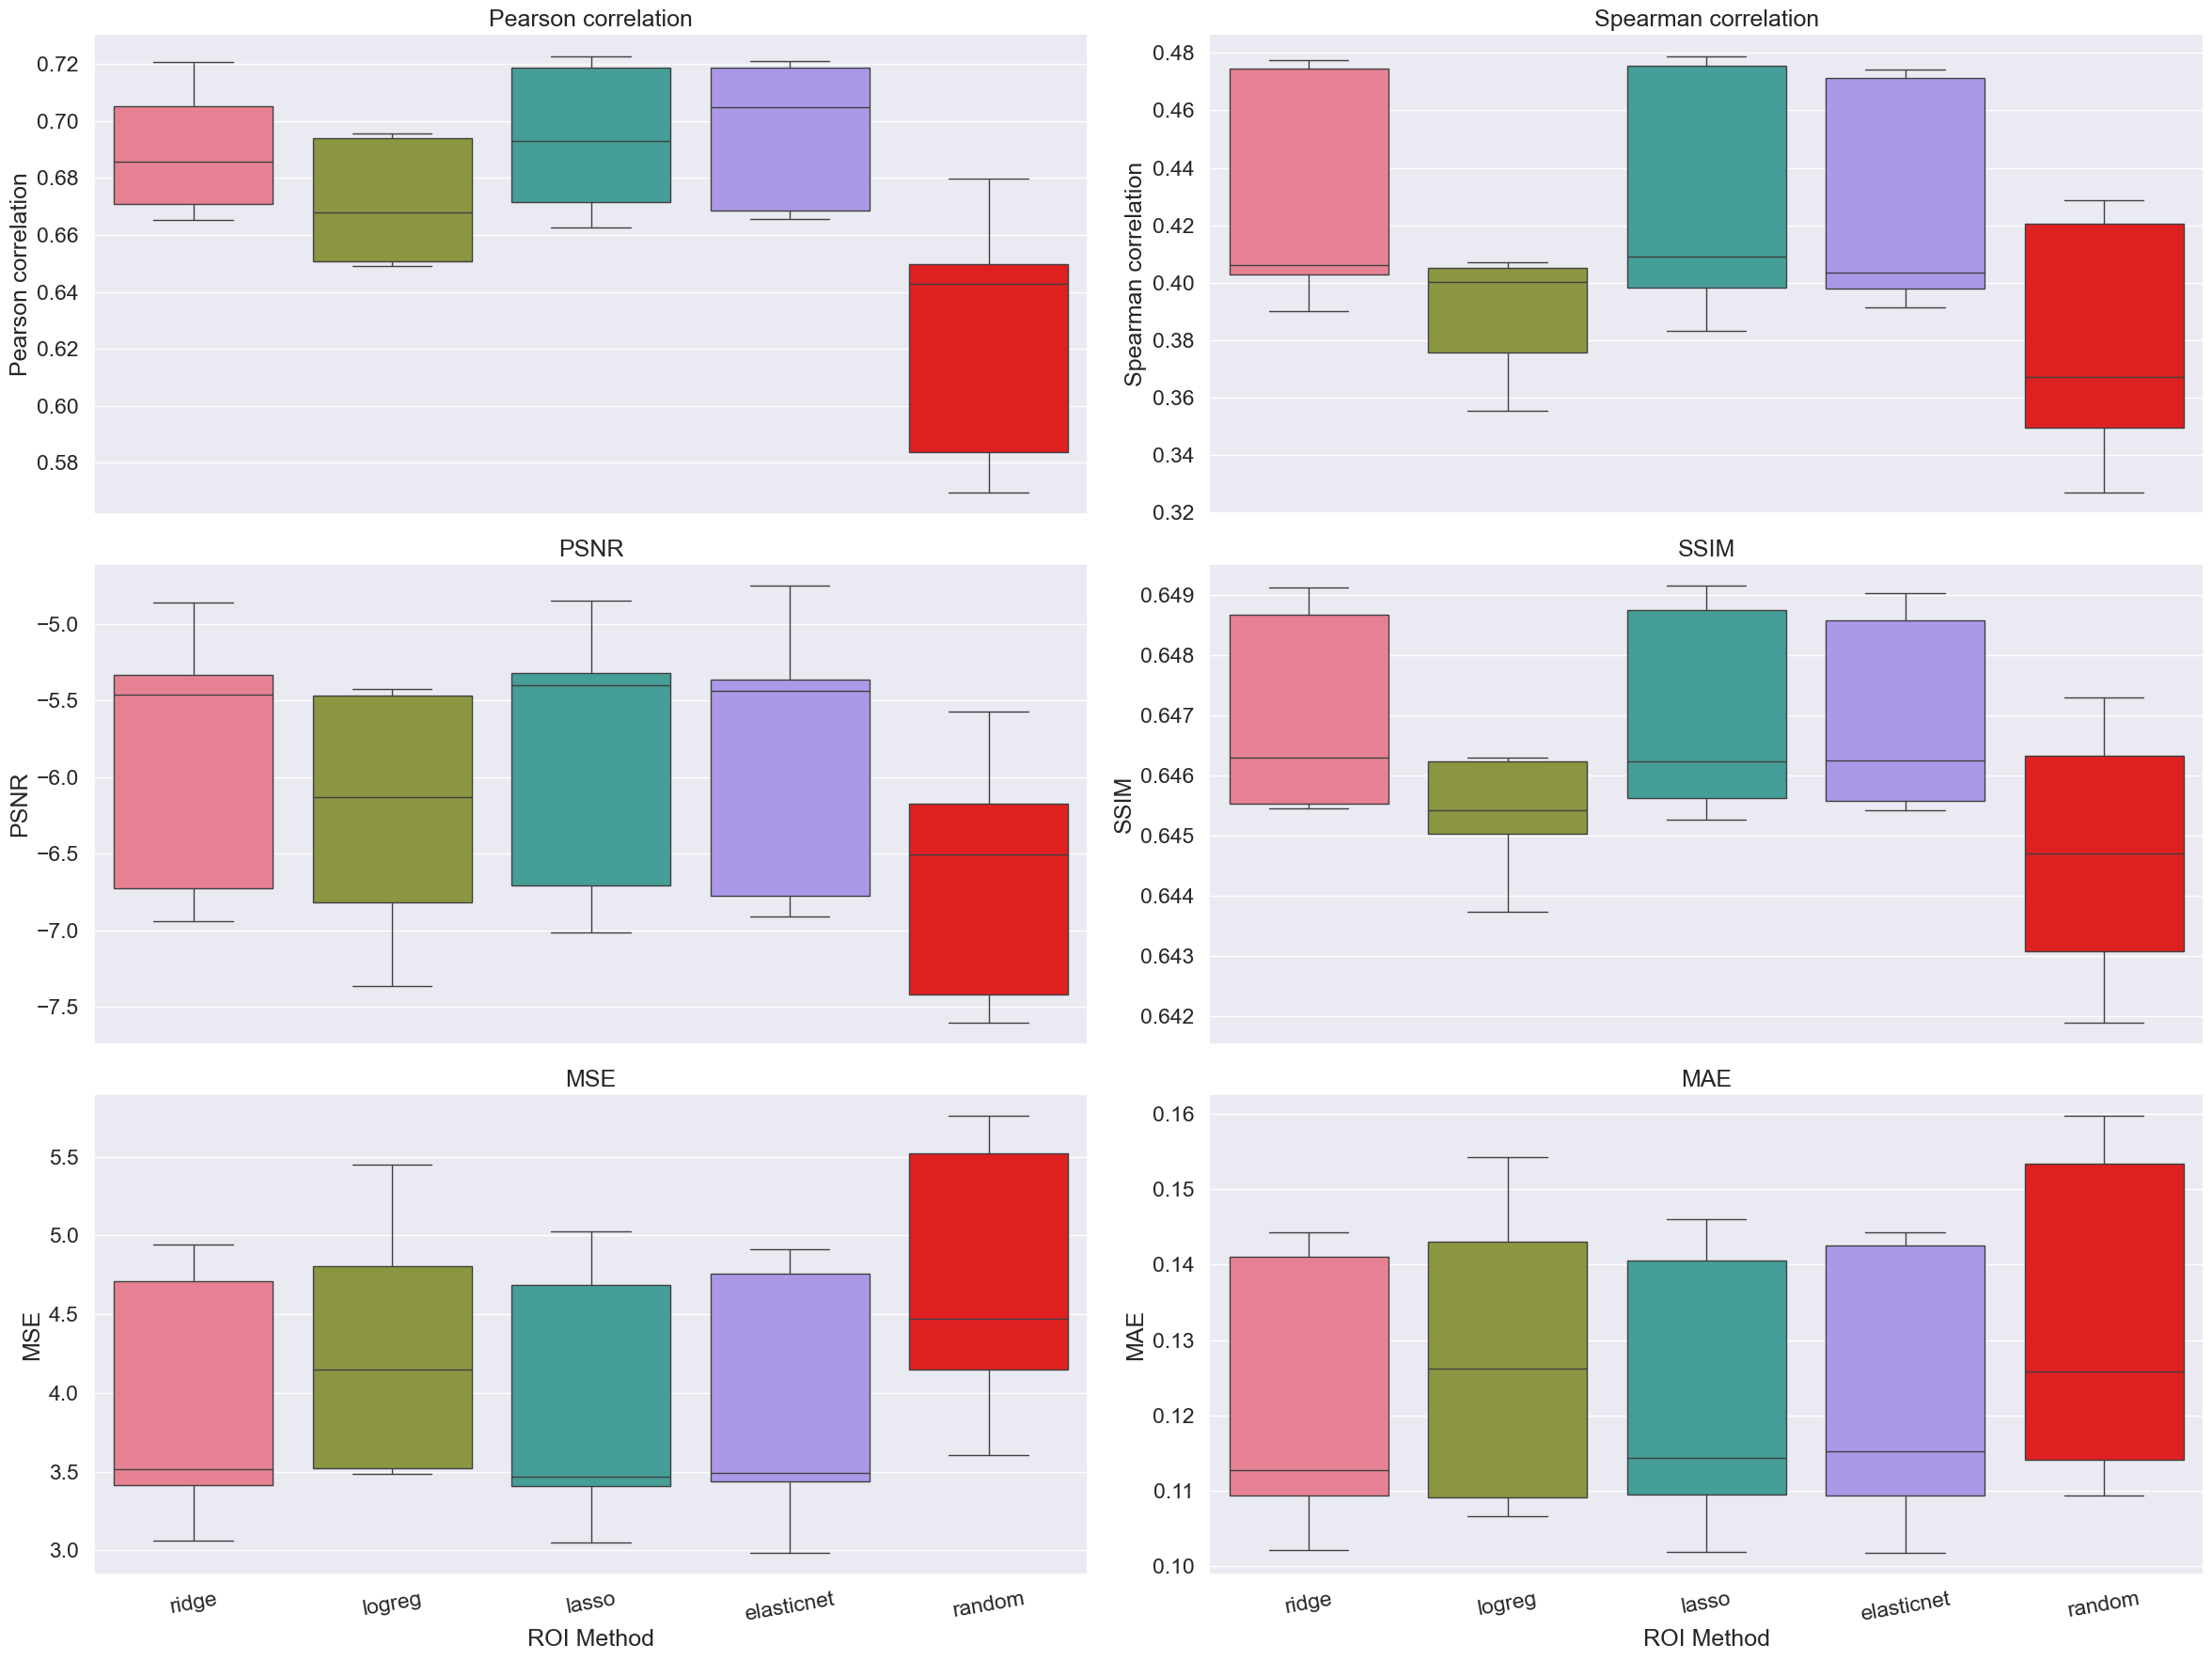

In [195]:
fig, ax = plt.subplots(3,2, figsize=(24, 18), sharex=True)
ax = ax.flatten()
for i, quality_measure in enumerate([('Pearson Correlation', 'Pearson correlation'), ('Spearman Correlation', 'Spearman correlation'), ('PSNR', 'PSNR'), ('SSIM', 'SSIM'), ('MSE', 'MSE'), ('MAE', 'MAE')]):
    sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=quality_measure[0], order=methods_list, palette=methods_colors, ax=ax[i])
    ax[i].set_title(f'{quality_measure[1]}')
    ax[i].set_ylabel(f'{quality_measure[1]}')
    ax[i].set_xlabel('ROI Method')
    ax[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('../figures/fig4/roi_performance_agg.png', bbox_inches='tight')
plt.show()

## Fig 5: Impact of ROI sparsity on performance metrics

## Fig 6: Impact of ROI sparsity on quality metrics

## Fig 7: Impact of HiCNN model on performance metrics

## Fig 8: Impact of HiCNN model on quality metrics

## Fig 9: Comprehensive summary